# SVM и его ядра
__Суммарное количество баллов: 10__

### Задание 1 (7 баллов)

Примените метод SVM (например, из библиотеки sklearn) для датасета blobs2.

Визуализируйте результат (разбиение плоскости и опорные вектора) при разных вариантах ядер (линейное; полиномиальное степеней 2,3,5; RBF).

In [1]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

from itertools import product
from time import time

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font='serif')

# imports from other HWs
import nbimporter

from hw01 import read_cancer_dataset, read_spam_dataset, train_test_split

Importing Jupyter notebook from hw01.ipynb


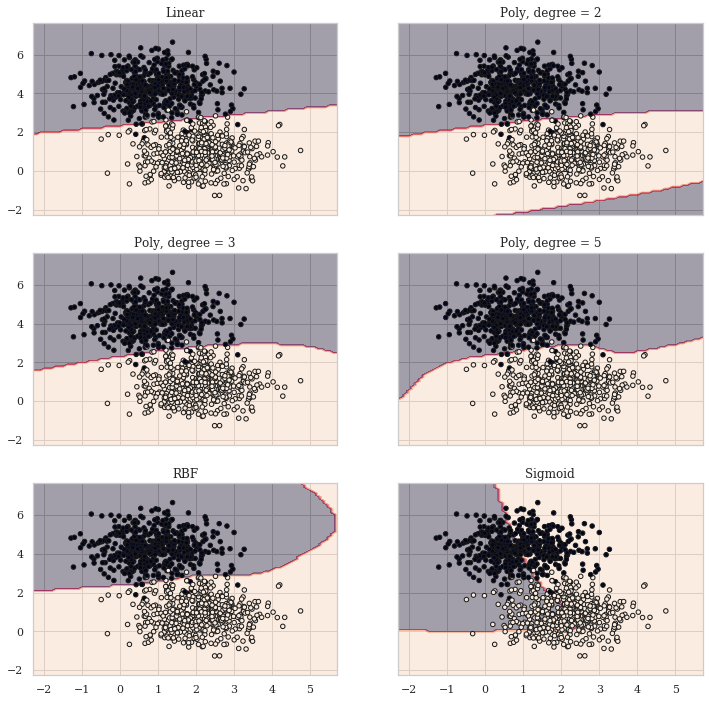

In [2]:
def read_blobs_dataset(path_to_csv):
    X = np.loadtxt(path_to_csv, skiprows=1, delimiter=",", usecols=(0,1))
    y = np.loadtxt(path_to_csv, skiprows=1, delimiter=",", usecols=2)
    return X, y

X, y = read_blobs_dataset('data/blobs2.csv')

clfs = [SVC(gamma='auto', kernel='linear'), 
        SVC(gamma='auto', kernel='poly', degree=2), 
        SVC(gamma='auto', kernel='poly'), 
        SVC(gamma='auto', kernel='poly', degree=5),
        SVC(gamma='auto', kernel='rbf'),
        SVC(gamma='auto', kernel='sigmoid')]

[clf.fit(X, y) for clf in clfs]

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(3, 2, sharex='col', sharey='row', figsize=(12, 12))

for (i1, i2), clf, tt in zip(product([0, 1, 2], [0, 1]),
                        clfs,
                        ['Linear', 'Poly, degree = 2', 
                         'Poly, degree = 3', 'Poly, degree = 5', 
                         'RBF', 'Sigmoid']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[i1, i2].contourf(xx, yy, Z, alpha=0.4)
    axarr[i1, i2].scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    axarr[i1, i2].set_title(tt)

plt.show()

### Задание 2 (3 балла)

Примените метод SVM на датасетах cancer и spam, разбитый предварительно на train (80%) и validate (20%). 

Сравните время работы SVM и Random Forest при близкой точности.

In [3]:
X, y = read_cancer_dataset('data/cancer.csv')
X_train, y_train, X_test, y_test = train_test_split(X, y, 0.8)

start = time()

svm_cls = SVC(gamma='auto', kernel='linear')
svm_cls.fit(X_train, y_train)
y_pred = svm_cls.predict(X_test)

print('Elapsed:', time() - start, 'seconds')
print('F_1 score:', f1_score(y_test, y_pred))

Elapsed: 0.7654588222503662 seconds
F_1 score: 0.975


In [4]:
start = time()

rf_cls = RandomForestClassifier(n_estimators=10)
rf_cls.fit(X_train, y_train)
y_pred = rf_cls.predict(X_test)

print('Elapsed:', time() - start, 'seconds')
print('F_1 score:', f1_score(y_test, y_pred))

Elapsed: 0.08829593658447266 seconds
F_1 score: 0.975609756097561


In [3]:
X, y = read_spam_dataset('data/spam.csv')
X_train, y_train, X_test, y_test = train_test_split(X, y, 0.8)

start = time()

svm_cls = SVC(gamma='auto', kernel='linear')
svm_cls.fit(X_train, y_train)
y_pred = svm_cls.predict(X_test)

print('Elapsed:', time() - start, 'seconds')
print('F_1 score:', f1_score(y_test, y_pred))

Elapsed: 482.27613496780396 seconds
F_1 score: 0.9199999999999999


In [4]:
start = time()

rf_cls = RandomForestClassifier(n_estimators=10)
rf_cls.fit(X_train, y_train)
y_pred = rf_cls.predict(X_test)

print('Elapsed:', time() - start, 'seconds')
print('F_1 score:', f1_score(y_test, y_pred))

Elapsed: 0.3111872673034668 seconds
F_1 score: 0.9514285714285714
